In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

from glob import glob
import numpy as np
import os
import pandas

import matplotlib.pyplot as plt
MPLSTYLE = '/arc/home/shiona/paper_sty.mplstyle'
plt.style.use(MPLSTYLE)

journal_textwidths = {'prd': 6.50127,
                      'none': 8.5,
                      'kaobook':6.5, # just a guess
                      'apj':6.0,
                      'aj': 6.0
                      } # Latex's \textwidth in inches

def figsize(fraction_of_textwidth = 0.45,height_per_width  = 1 / 1.61803399,journal = 'prd'):
    """When making your figure, decide its aspect ratio and your journal and its width as a fraction of the \textwidth of the journal. Then use matplotlib.pyplot.Figure(figsize = ...) to specify the right size"""
    textwidth = journal_textwidths[journal]
    width_in = textwidth * fraction_of_textwidth
    height_in = height_per_width * width_in
    return (width_in, height_in)

plt.rcParams["figure.figsize"] = figsize( 2 / 1.61803399,journal = 'apj')


In [4]:
df=pandas.read_csv('/arc/home/shiona/calibrator_surv/sources_x_rfc.csv')
df_rfc=pandas.read_csv('/arc/home/shiona/calibrator_surv/rfc_pointed.csv')

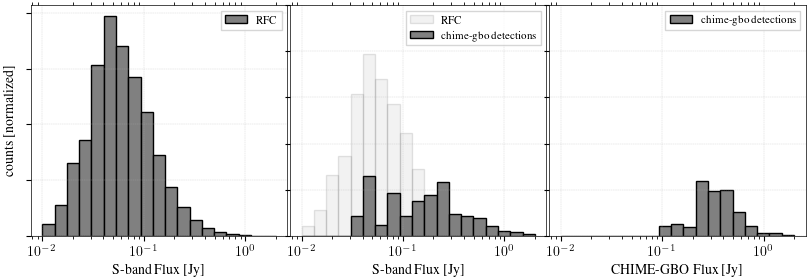

In [63]:
figure = plt.figure(figsize=(10, 3))
grid = plt.GridSpec(1,3, figure=figure,wspace=0.01)

axis_size=10

ax1 = plt.subplot(grid[0,0])

#ax2.set_yticks(ax.get_xticks())

logbins = np.logspace(-2,.3,20)

flux='Sflux'
#ax.hist(np.log10(df_rfc[flux]),density=True,bins='auto',histtype='step',label='rfc catalog')
ax1.set_xscale('log')

ax1.hist((df_rfc[flux]),density=True,bins=logbins,color='gray',edgecolor='black',label='RFC')

ax1.legend(loc='upper right')
ax1.set_xlabel(r'S-band Flux [Jy]',fontsize=axis_size)
ax1.tick_params(top=True, labeltop=False, which='minor',bottom=True, labelbottom=True)
ax1.set_yticklabels([])
ax1.set_ylabel('counts [normalized]',fontsize=axis_size)


ax = plt.subplot(grid[0,1])

flux_full='S-band'
ax.set_xscale('log')
ax.hist((df_rfc[flux]),density=True,bins=logbins,color='gray',edgecolor='black',alpha=.1,label='RFC')
ax.hist((df[flux]),density=True,bins=logbins,color='gray',edgecolor='black',label='chime-gbo detections')
ax.legend(loc='upper right')
ax.set_xlabel(r'S-band Flux [Jy]',fontsize=axis_size)
ax.set_yticklabels([])
ax.set_yticks(ax1.get_yticks())
ax.tick_params(top=True, labeltop=False, which='minor',bottom=True, labelbottom=True)




ax = plt.subplot(grid[0,2])

flux='chime_gbo_flux'
ax.set_xscale('log')
ax.hist((df[flux]),density=True,bins=logbins,color='gray',edgecolor='black',label='chime-gbo detections')
ax.legend(loc='upper right')
ax.set_xlabel(r'CHIME-GBO Flux [Jy]',fontsize=axis_size)
ax.set_yticklabels([])
ax.set_yticks(ax1.get_yticks())


ax.tick_params(top=True, labeltop=False, which='minor',bottom=True, labelbottom=True)

figure.savefig('/arc/home/shiona/calibrator_surv/figures/flux_counts.pdf',bbox_inches='tight')

Text(0, 0.5, 'chime-gbo flux [Jy]')

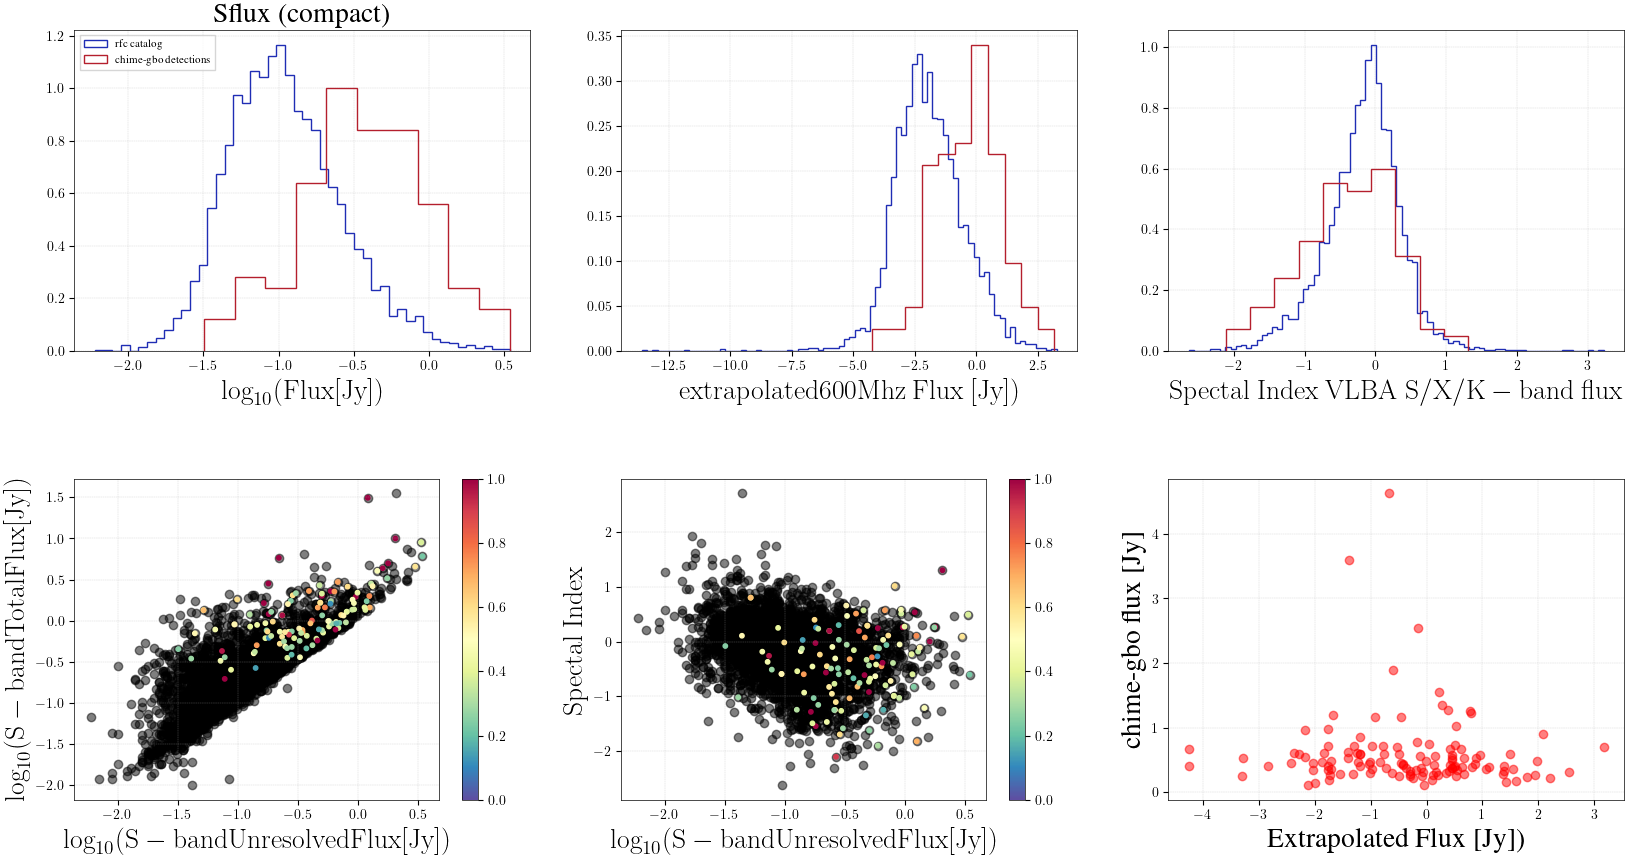

In [9]:
figure = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(2,3, figure=figure,hspace=.4)

axis_size=20

ax = plt.subplot(grid[0,0])

flux='Sflux'
ax.set_title(f'{flux} (compact)')
ax.hist(np.log10(df_rfc[flux]),density=True,bins='auto',histtype='step',label='rfc catalog')
ax.hist(np.log10(df[flux]),density=True,bins='auto',histtype='step',label='chime-gbo detections')
ax.legend(loc='upper left')
ax.set_xlabel(r'$\rm{log}_{10}(Flux [Jy])$',fontsize=axis_size)

ax = plt.subplot(grid[0,1])

flux_full='S-band'
ax.hist(np.array(df_rfc['interpolated_flux']),density=True,bins='auto',histtype='step',label='rfc catalog')
ax.hist(np.array(df['interpolated_flux']),density=True,bins='auto',histtype='step',label='chime-gbo detections')
ax.set_xlabel(r'$\rm{extrapolated 600Mhz \ Flux \ [Jy]})$',fontsize=axis_size)

ax = plt.subplot(grid[0,2])
val='alpha'
ax.hist((df_rfc[val]),density=True,bins='auto',histtype='step',label='rfc catalog')
ax.hist((df[val]),density=True,bins='auto',histtype='step',label='chime-gbo detections')
ax.set_xlabel(r'$\rm{Spectal \ Index \ VLBA \ S/X/K-band \ flux}$',fontsize=axis_size)

c='chime_gbo_flux' #'chime-gbo_snr_100ms'
vmin=0
vmax=1
ax = plt.subplot(grid[1,0])

ax.scatter(np.log10(df_rfc[flux]),np.log10(df_rfc[flux_full]),color='black',alpha=.5)
im=ax.scatter(np.log10(df[flux]),np.log10(df[flux_full]),c=df[c],s=10,
              cmap='Spectral_r',vmin=vmin,vmax=vmax)
plt.colorbar(im)
ax.set_xlabel(r'$\rm{log}_{10}(S-band Unresolved Flux [Jy])$',fontsize=axis_size)
ax.set_ylabel(r'$\rm{log}_{10}(S-band Total Flux [Jy])$',fontsize=axis_size)



ax = plt.subplot(grid[1,1])


ax.scatter(np.log10(df_rfc[flux]),(df_rfc[val]),color='black',alpha=.5)
im=ax.scatter(np.log10(df[flux]),(df[val]),c=df[c],s=10,cmap='Spectral_r',
              vmin=vmin,vmax=vmax)
plt.colorbar(im)
ax.set_xlabel(r'$\rm{log}_{10}(S-band Unresolved Flux [Jy])$',fontsize=axis_size)
#ax.set_ylabel(r'$\rm{log}_{10}(S-band Total Flux [Jy])$',fontsize=axis_size)
ax.set_ylabel(r'$\rm{Spectal \ Index}$',fontsize=axis_size)


ax = plt.subplot(grid[1,2])
ax.scatter(df['interpolated_flux'],(df[c]),color='red',alpha=.5)
ax.set_xlabel(r'Extrapolated Flux [Jy])',fontsize=axis_size)
#ax.set_ylabel(r'$\rm{log}_{10}(S-band Total Flux [Jy])$',fontsize=axis_size)
ax.set_ylabel(r'chime-gbo flux [Jy]',fontsize=axis_size)
